# Wiener Process

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-darkgrid')

## Wiener process

Many times series have some measure of randomness. One way of modeling these random processes is using a [Wiener Process](http://en.wikipedia.org/wiki/Wiener_process). For our purposes, A Wiener Process $W(t)$ is a time series for which:

* $W(t=0)=0$
* For any finite time difference $h$, $W(t+h)-W(t)\sim\mathcal{N}(0,h)$

In other words, subsequent values in the time series are normally distributed with a mean of $0$ and variance $h$ and the time series starts with a value of zero. The Wiener Process is also known as Brownian motion; the behavior is identical to that observed in physical diffusion processes.

With this in mind, write a function, `wiener(tmax, n)`, that simulates a discrete Wiener process. Your function should take the maximum time $t_{max}$ and the number of steps `n` and return a tuple of two arrays with length `n`:

* An array of times used $t_i$
* An array of the values of the Wiener process at those times $W_i = W(t_i)$

Here is a rough sketch of how to approach this:

1. Create an array of `n` times $t \in [0,t_{max}]$
2. Find the time difference $h=t_1-t_0$
3. Draw `n-1` random numbers appropriate for the Wiener process
4. Perform a cumulative sum of the random numbers

Use NumPy and no for loops in your implementation.

In [2]:
def wiener(tmax, n):
    t = np.arange(0, n) * tmax
    h = t[1] - t[0]
    
    wt = np.random.normal(0, h, (n-1, n-1))
    w = np.cumsum(list(wt)[1])
    
    t = np.insert(list(wt)[0],0,0)
    w = np.gradient(w)
    w = np.insert(w,0,0)
              
    return t,w


Call the `wiener` function to simulate a Wiener process with `1000` steps and max time of `1.0`. Save the results as two arrays `t` and `W`.

In [3]:
results = wiener(1.0, 1000)
t = list(results)[0]
W = list(results)[1]
print(len(t), len(W))

1000 1000


In [4]:
assert isinstance(t, np.ndarray)
assert isinstance(W, np.ndarray)
assert t.dtype==np.dtype(float)
assert W.dtype==np.dtype(float)
assert len(t)==len(W)==1000
assert W[0]==0.0

Visualize the process using `plt.plot` with `t` on the x-axis and `W(t)` on the y-axis. Label your x and y axes.

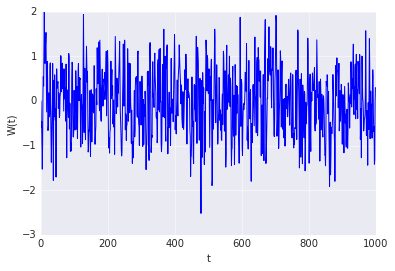

In [5]:
plt.plot(W)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()

For a given time $t$, $W(t)$ is itself a random variable. Thus if you keep calling `wiener(tmax, n)`, the value of process at the final time will be different each time. To see this, run the following cell a bunch of times. This cell keeps printing the value $W(2.0)$:

In [6]:
for i in range(50):
    t1, W1 = wiener(2.0, 100)
    print(W1[-1])

-0.674258644214
-1.128112139
-6.21702578718
1.49291699516
-2.31445632067
-0.577020214633
0.150487137216
-1.42551090152
3.44261575742
1.41811897188
0.737148697449
-1.17319892857
2.36148106143
-0.895951979949
0.520356995747
-2.29346054827
-3.80841613754
1.90197565901
-0.161134207087
-0.930890943176
2.60657889551
0.0912495493271
1.06552350353
-3.6234372034
-1.8065479223
-3.34416350603
1.5970429223
-1.82877784192
-2.52667694179
1.51161544407
-1.16567913215
-0.151860518236
-0.954309572849
4.13113184919
-2.00622839677
5.08351141324
-0.803059645292
0.213424438805
0.404531687025
-0.565117839692
-0.963397341207
-1.50578512922
-0.476333536704
-2.11135010017
-3.48491907058
1.60657182388
-2.31181674352
0.351903907509
4.97926705888
-0.949118085208


There are a number of important theoretical results about the random variable $W(t)$:

* It has a mean of 0, or $E[W(t)]$=0.0.
* It has a variance of $t$, or $E[W(t)^2]-E^2[W(t)]=t$

For $t=2.0$ perform 500 simulations of $W(2.0)$, each with 500 points, and show that the mean is close to $0.0$ and variance close to $2.0$.

In [7]:
for i in range(500):
    t1, W1 = wiener(2.0, 500)
    print("t: ", t.mean(), "W(2): ", W1.var())

t:  -0.00872299865244 W(2):  2.05918689574
t:  -0.00872299865244 W(2):  1.98230373841
t:  -0.00872299865244 W(2):  1.9432533038
t:  -0.00872299865244 W(2):  1.91009314961
t:  -0.00872299865244 W(2):  1.64236126198
t:  -0.00872299865244 W(2):  2.16041035681
t:  -0.00872299865244 W(2):  2.10036138192
t:  -0.00872299865244 W(2):  1.74660634672
t:  -0.00872299865244 W(2):  2.1232741433
t:  -0.00872299865244 W(2):  2.0591914129
t:  -0.00872299865244 W(2):  1.98295653591
t:  -0.00872299865244 W(2):  2.01797590361
t:  -0.00872299865244 W(2):  2.0129229943
t:  -0.00872299865244 W(2):  2.00900921472
t:  -0.00872299865244 W(2):  2.02376207134
t:  -0.00872299865244 W(2):  1.81110630883
t:  -0.00872299865244 W(2):  1.92635578499
t:  -0.00872299865244 W(2):  1.97031050156
t:  -0.00872299865244 W(2):  1.6926162949
t:  -0.00872299865244 W(2):  1.8870852837
t:  -0.00872299865244 W(2):  2.17636937228
t:  -0.00872299865244 W(2):  2.02343910656
t:  -0.00872299865244 W(2):  1.75166605822
t:  -0.0087229986

## Geometric brownian motion

[Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is another type of stochastic time series that can be generated using the Wiener Process. Given a Wiener process $W(t)$, the corresponding Geometric Brownian process $X(t)$ is:

$$
X(t) = X_0 e^{((\mu - \sigma^2/2)t + \sigma W(t))}
$$

The parameters $\mu$ and $\sigma$ are known as the *drift* and *volatility* of the process respectively, and $X_0$ is the initial condition $X(t=0)=X_0$. Geometric Brownian motion is used in modelling the prices of financial instruments such as stocks.

Write a function, `geo_brownian`, that generates geometric brownian motion from an existing Wiener process.

Use Numpy and no for loops in your function.

In [8]:
import math

def geo_brownian(t, W, X0, mu, sigma):
    x = X0*np.exp(((mu-sigma**2)/2)*t + sigma*W)
    return x
    

Use your function to simulate geometric brownian motion, $X(t)$ for $X_0=1.0$, $\mu=0.5$ and $\sigma=0.3$ with the Wiener process you computed above.

Visualize the process using `plt.plot` with `t` on the x-axis and `X(t)` on the y-axis. Label your x and y axes.

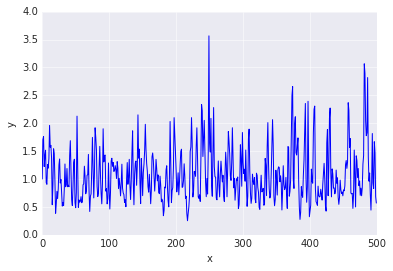

In [10]:
graph = geo_brownian(t1, W1, 1.0, .05, .3)
plt.plot(graph)
plt.ylabel('y')
plt.xlabel('x')
plt.show()